In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stripROtools


#from matplotlib import style
#style.use('dark_background')

In [24]:
# Edges used by histograms
strip_edges = np.arange(-0.5,512.5,1.0)
adc_edges = np.arange(-0.5,1023.5,1.0)

# UH DLC Micromegas

In [27]:

# Mesh voltage values to include in analysis
UoS_DLC_Vmesh = [1000]

# Empty lists to fill with data
UH_DLC_xLyL_gain = []
UH_DLC_xLyLgain_err = []
UH_DLC_xLyL_GR = []
UH_DLC_xLyL_GR_err = []
UH_DLC_xLyL_CS = []

UH_DLC_xLyH_gain = []
UH_DLC_xLyHgain_err = []
UH_DLC_xLyH_GR = []
UH_DLC_xLyH_GR_err = []
UH_DLC_xLyH_CS = []

UH_DLC_xHyL_gain = []
UH_DLC_xHyLgain_err = []
UH_DLC_xHyL_GR = []
UH_DLC_xHyL_GR_err = []
UH_DLC_xHyL_CS = []

UH_DLC_xHyH_gain = []
UH_DLC_xHyHgain_err = []
UH_DLC_xHyH_GR = []
UH_DLC_xHyH_GR_err = []
UH_DLC_xHyH_CS = []


(array([  13187.,  961125., 1110806.,  872478.,  741863.,  571053.,
         358937.,  158044.,   44311.,    9439.]),
 array([   0. ,  102.3,  204.6,  306.9,  409.2,  511.5,  613.8,  716.1,
         818.4,  920.7, 1023. ]),
 <a list of 10 Patch objects>)

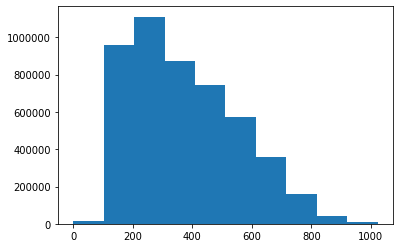

In [28]:
plt.hist(x_hits.adc)

(array([   417., 384742.,   1362.,   5585.,   6548.,   5763.,   7833.,
          4288.,    863.,  24749.]),
 array([   0. ,  102.3,  204.6,  306.9,  409.2,  511.5,  613.8,  716.1,
         818.4,  920.7, 1023. ]),
 <a list of 10 Patch objects>)

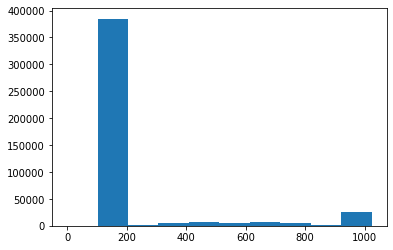

In [29]:
plt.hist(y_hits.adc)

--------------------UH DLC Micromegas, Vmesh =  1000 --------------------
Raw y hits


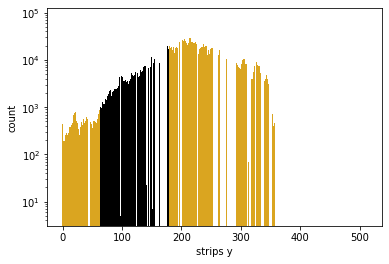

Raw x hits


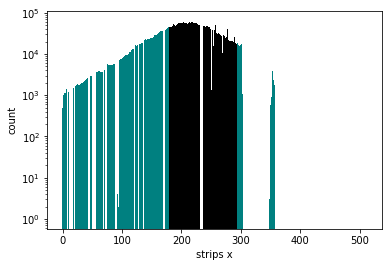

Fe55 distribtuion on full readout plane


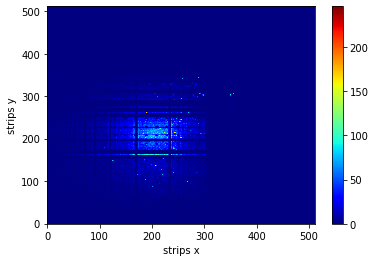

High x low y CrystalBall fit


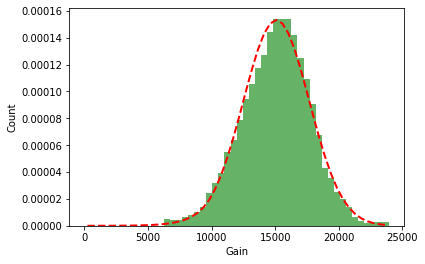

High x high y CrystalBall fit


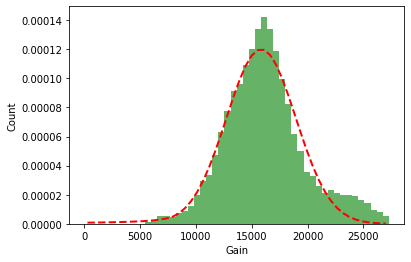

Low x low y CrystalBall fit


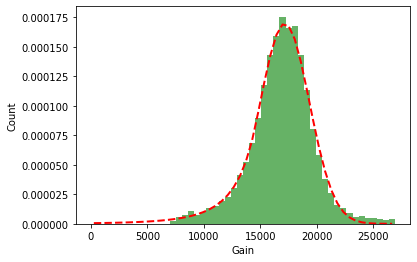

Low x high y CrystalBall fit


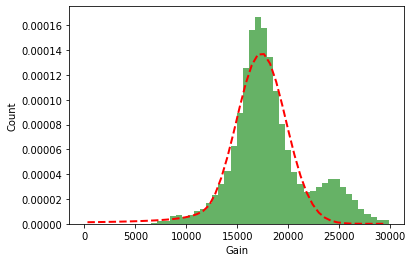

In [30]:
for Vmesh in UoS_DLC_Vmesh:


    print("--------------------UH DLC Micromegas, Vmesh = ", str(Vmesh),"--------------------")

    # Location of data
    file_loc = ["/Users/majdghrear/data/VMM3a_SRS/AUG23/UoS/Fe55/"+str(Vmesh)+"Vmesh_bc_40p000_tac_60_ccs_4_cs_2_dt_200_mst_1_spc_1500_dp_200_cr_0p00-100p00_coin_center-of-mass_test.root"]

    # Create pandas data frame of the cluster and hit info
    df_cluster, df_hits = stripROtools.read_root(file_loc, clusters=True, hits=True)

    # Isolate x and y hits
    x_hits = df_hits.loc[df_hits.plane == 0].reset_index()
    y_hits = df_hits.loc[df_hits.plane == 1].reset_index()

    # Define additional columns
    # count number of hits in the event
    df_cluster["nhits"]=df_cluster.apply(lambda row: len(row.strips0)+len(row.strips1) ,axis=1)

    #compute number of electrons in event
    # Per Lucian 1 ADC ~ 1 mV
    df_cluster["electrons_x"] = df_cluster.adc0.apply(lambda x: 6240 * ( x  / 9.0 ) ) # 9 mV/fC is VMM gain setting for x channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
    df_cluster["electrons_y"] = df_cluster.adc1.apply(lambda x: 6240 * ( x / 4.5 ) ) # 4.5 mV/fC is VMM gain setting for y channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
    df_cluster["electrons"] = df_cluster.electrons_x + df_cluster.electrons_y
    df_cluster["gain"] = df_cluster["electrons"] / 167.5

    # Display raw y hits
    print("Raw y hits")
    plt.figure()
    n, bins, patches = plt.hist(y_hits.pos,bins=strip_edges,histtype='bar',color="goldenrod")
    n, bins, patches = plt.hist(y_hits.loc[y_hits.vmm == 13].pos,bins=strip_edges,histtype='bar',color="k")
    n, bins, patches = plt.hist(y_hits.loc[y_hits.vmm == 10].pos,bins=strip_edges,histtype='bar',color="k")
    plt.xlabel("strips y")
    plt.ylabel("count")
    plt.yscale("log")
    plt.show()

    # Display raw x hits
    print("Raw x hits")
    plt.figure()
    n, bins, patches = plt.hist(x_hits.pos,bins=strip_edges,histtype='bar',color="teal")
    n, bins, patches = plt.hist(x_hits.loc[x_hits.vmm == 2].pos,bins=strip_edges,histtype='bar',color="k")
    n, bins, patches = plt.hist(x_hits.loc[x_hits.vmm == 5].pos,bins=strip_edges,histtype='bar',color="k")
    plt.xlabel("strips x")
    plt.ylabel("count")
    plt.yscale("log")
    plt.show()

    # Visualize distribution of Fe55 clusters on readout plane
    print("Fe55 distribtuion on full readout plane")
    plt.figure()
    plt.hist2d(df_cluster.pos0, df_cluster.pos1, bins=[strip_edges,strip_edges], cmap=plt.cm.jet)
    plt.xlabel("strips x")
    plt.ylabel("strips y")
    plt.colorbar()
    plt.show()


    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=5, n_vmm_y=10, min_hits=5, map = 'UoS')
    print("High x low y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_DLC_xHyL_gain += [mu]
    UH_DLC_xHyLgain_err += [mu_err]
    UH_DLC_xHyL_GR += [1.0*sigma/mu]
    UH_DLC_xHyL_GR_err += [( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_DLC_xHyL_CS += [charge_sharing]

    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=5, n_vmm_y=13, min_hits=5, map = 'UoS')
    print("High x high y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_DLC_xHyH_gain += [mu]
    UH_DLC_xHyHgain_err += [mu_err]
    UH_DLC_xHyH_GR += [1.0*sigma/mu]
    UH_DLC_xHyH_GR_err += [( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_DLC_xHyH_CS += [charge_sharing]

    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=2, n_vmm_y=10, min_hits=5, map = 'UoS')
    print("Low x low y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_DLC_xLyL_gain += [mu]
    UH_DLC_xLyLgain_err += [mu_err]
    UH_DLC_xLyL_GR += [1.0*sigma/mu]
    UH_DLC_xLyL_GR_err += [( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_DLC_xLyL_CS += [charge_sharing]


    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=2, n_vmm_y=13, min_hits=5, map = 'UoS')
    print("Low x high y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_DLC_xLyH_gain += [mu]
    UH_DLC_xLyHgain_err += [mu_err]
    UH_DLC_xLyH_GR += [1.0*sigma/mu]
    UH_DLC_xLyH_GR_err += [ ( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_DLC_xLyH_CS += [charge_sharing]




# UH No DLC Micromegas

In [5]:

# Mesh voltage values to include in analysis
UH_NoDLC_Vmesh = [620,630,640,650,660]

# Empty lists to fill with data
UH_NoDLC_xLyL_gain = []
UH_NoDLC_xLyLgain_err = []
UH_NoDLC_xLyL_GR = []
UH_NoDLC_xLyL_GR_err = []
UH_NoDLC_xLyL_CS = []

UH_NoDLC_xLyH_gain = []
UH_NoDLC_xLyHgain_err = []
UH_NoDLC_xLyH_GR = []
UH_NoDLC_xLyH_GR_err = []
UH_NoDLC_xLyH_CS = []

UH_NoDLC_xHyL_gain = []
UH_NoDLC_xHyLgain_err = []
UH_NoDLC_xHyL_GR = []
UH_NoDLC_xHyL_GR_err = []
UH_NoDLC_xHyL_CS = []

UH_NoDLC_xHyH_gain = []
UH_NoDLC_xHyHgain_err = []
UH_NoDLC_xHyH_GR = []
UH_NoDLC_xHyH_GR_err = []
UH_NoDLC_xHyH_CS = []


--------------------UH No DLC Micromegas, Vmesh =  620 --------------------
Raw y hits


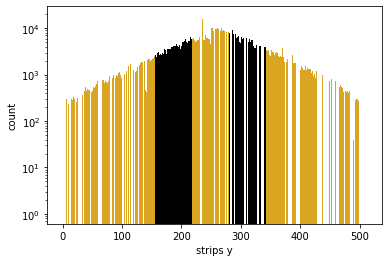

Raw x hits


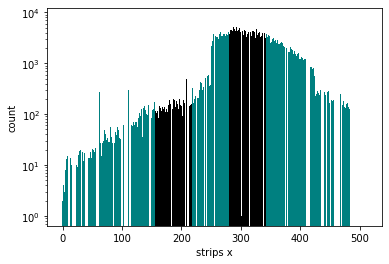

Fe55 distribtuion on full readout plane


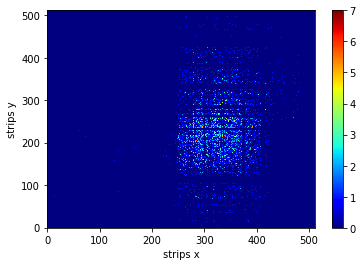

High x low y CrystalBall fit


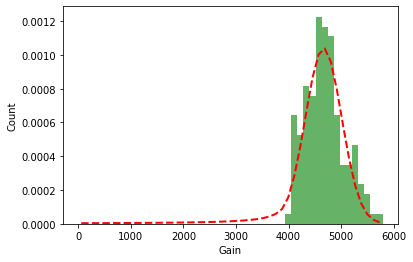

High x high y CrystalBall fit


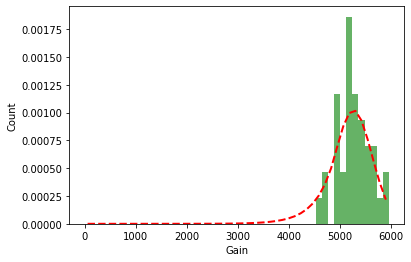

Low x low y CrystalBall fit
-fit failed-
Low x high y CrystalBall fit
-fit failed-
--------------------UH No DLC Micromegas, Vmesh =  630 --------------------
Raw y hits


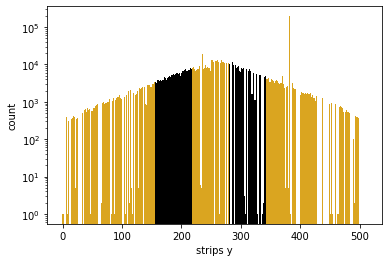

Raw x hits


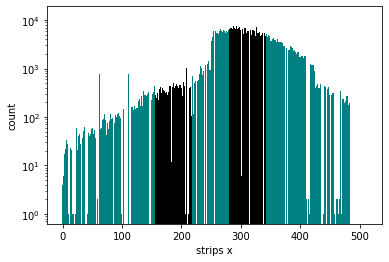

Fe55 distribtuion on full readout plane


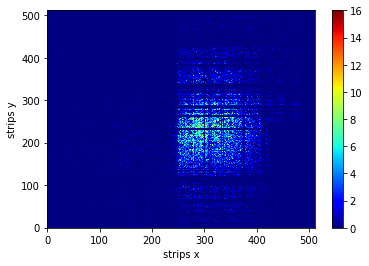

High x low y CrystalBall fit


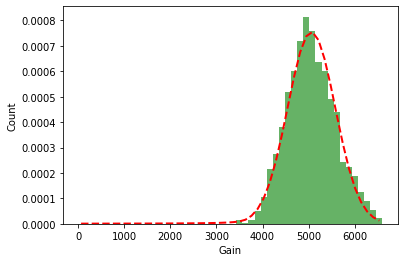

High x high y CrystalBall fit


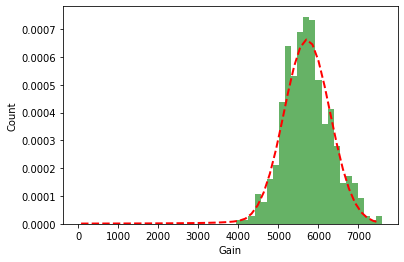

Low x low y CrystalBall fit


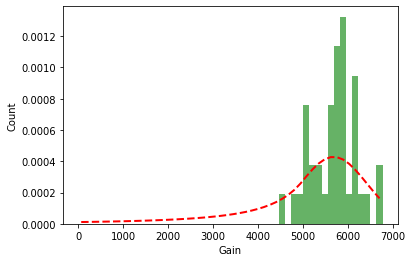

Low x high y CrystalBall fit
-fit failed-
--------------------UH No DLC Micromegas, Vmesh =  640 --------------------
Raw y hits


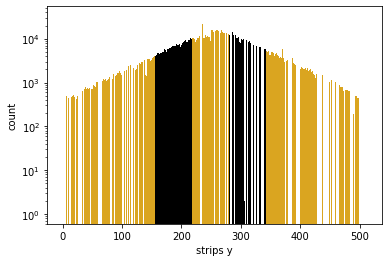

Raw x hits


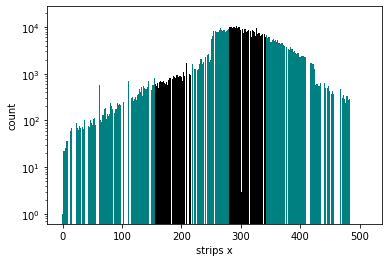

Fe55 distribtuion on full readout plane


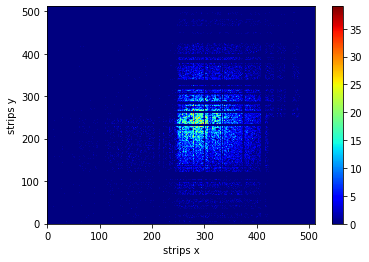

High x low y CrystalBall fit


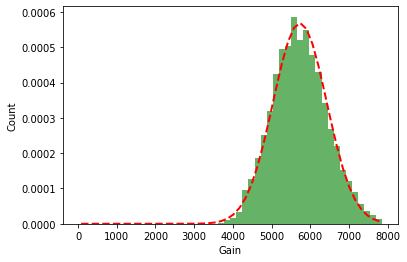

High x high y CrystalBall fit


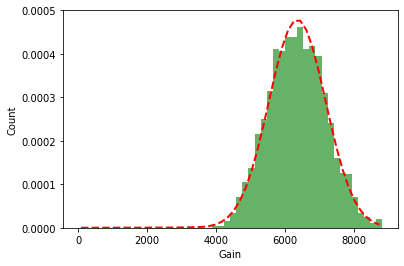

Low x low y CrystalBall fit


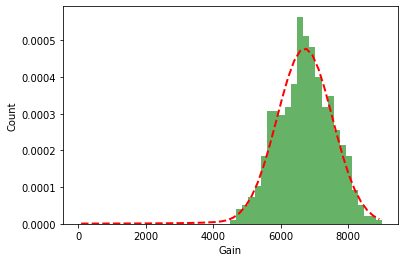

Low x high y CrystalBall fit


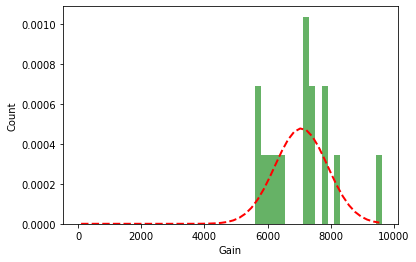

--------------------UH No DLC Micromegas, Vmesh =  650 --------------------
Raw y hits


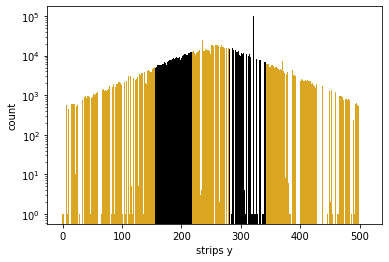

Raw x hits


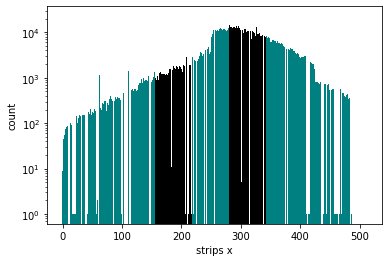

Fe55 distribtuion on full readout plane


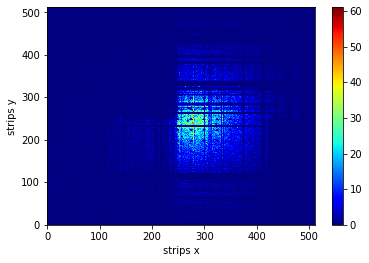

High x low y CrystalBall fit


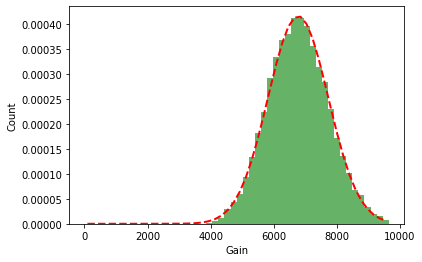

High x high y CrystalBall fit


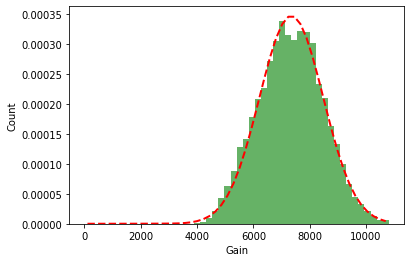

Low x low y CrystalBall fit


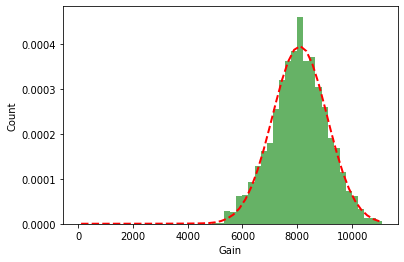

Low x high y CrystalBall fit


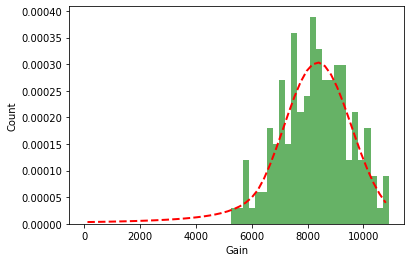

--------------------UH No DLC Micromegas, Vmesh =  660 --------------------
Raw y hits


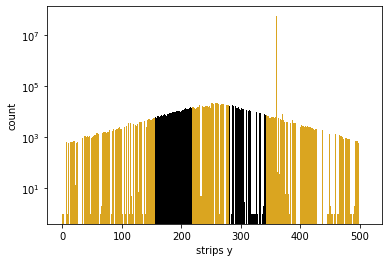

Raw x hits


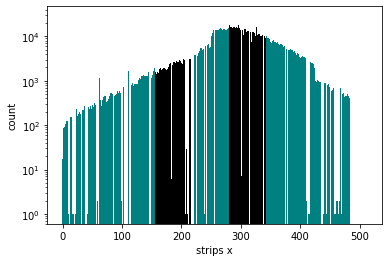

Fe55 distribtuion on full readout plane


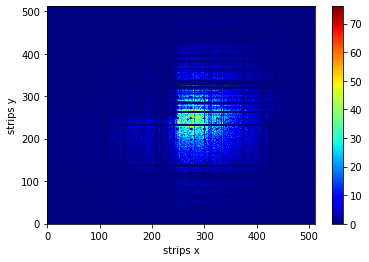

High x low y CrystalBall fit


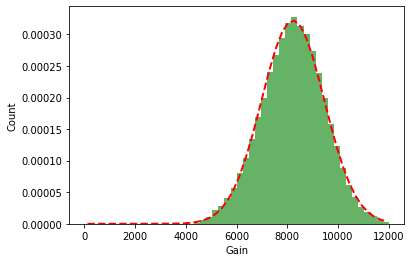

High x high y CrystalBall fit
-fit failed-
Low x low y CrystalBall fit


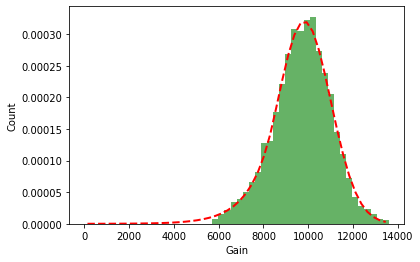

Low x high y CrystalBall fit


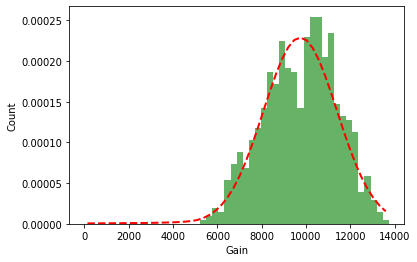

In [6]:
for Vmesh in UH_NoDLC_Vmesh:


    print("--------------------UH No DLC Micromegas, Vmesh = ", str(Vmesh),"--------------------")

    # Location of data
    file_loc = ["/Users/majdghrear/data/VMM3a_SRS/AUG23/UH_NoDLC/Fe55/"+str(Vmesh)+"Vmesh_bc_40p000_tac_60_ccs_4_cs_2_dt_200_mst_1_spc_1500_dp_200_cr_0p20-2p00_coin_center-of-mass_test.root"]

    # Create pandas data frame of the cluster and hit info
    df_cluster, df_hits = stripROtools.read_root(file_loc, clusters=True, hits=True)

    # Isolate x and y hits
    x_hits = df_hits.loc[df_hits.plane == 0].reset_index()
    y_hits = df_hits.loc[df_hits.plane == 1].reset_index()

    # Define additional columns
    # count number of hits in the event
    df_cluster["nhits"]=df_cluster.apply(lambda row: len(row.strips0)+len(row.strips1) ,axis=1)

    #compute number of electrons in event
    # Per Lucian 1 ADC ~ 1 mV
    df_cluster["electrons_x"] = df_cluster.adc0.apply(lambda x: 6240 * ( x  / 9.0 ) ) # 9 mV/fC is VMM gain setting for x channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
    df_cluster["electrons_y"] = df_cluster.adc1.apply(lambda x: 6240 * ( x / 4.5 ) ) # 4.5 mV/fC is VMM gain setting for y channels, 170mV is the pedestal, 1200mV is th operating voltage 1024 is the number of possible ADC values
    df_cluster["electrons"] = df_cluster.electrons_x + df_cluster.electrons_y
    df_cluster["gain"] = df_cluster["electrons"] / 167.5

    # Display raw y hits
    print("Raw y hits")
    plt.figure()
    n, bins, patches = plt.hist(y_hits.pos,bins=strip_edges,histtype='bar',color="goldenrod")
    n, bins, patches = plt.hist(y_hits.loc[y_hits.vmm == 13].pos,bins=strip_edges,histtype='bar',color="k")
    n, bins, patches = plt.hist(y_hits.loc[y_hits.vmm == 10].pos,bins=strip_edges,histtype='bar',color="k")
    plt.xlabel("strips y")
    plt.ylabel("count")
    plt.yscale("log")
    plt.show()

    # Display raw x hits
    print("Raw x hits")
    plt.figure()
    n, bins, patches = plt.hist(x_hits.pos,bins=strip_edges,histtype='bar',color="teal")
    n, bins, patches = plt.hist(x_hits.loc[x_hits.vmm == 2].pos,bins=strip_edges,histtype='bar',color="k")
    n, bins, patches = plt.hist(x_hits.loc[x_hits.vmm == 5].pos,bins=strip_edges,histtype='bar',color="k")
    plt.xlabel("strips x")
    plt.ylabel("count")
    plt.yscale("log")
    plt.show()

    # Visualize distribution of Fe55 clusters on readout plane
    print("Fe55 distribtuion on full readout plane")
    plt.figure()
    plt.hist2d(df_cluster.pos0, df_cluster.pos1, bins=[strip_edges,strip_edges], cmap=plt.cm.jet)
    plt.xlabel("strips x")
    plt.ylabel("strips y")
    plt.colorbar()
    plt.show()

    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=5, n_vmm_y=10, min_hits=5)
    print("High x low y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_NoDLC_xHyL_gain += [mu]
    UH_NoDLC_xHyLgain_err += [mu_err]
    UH_NoDLC_xHyL_GR += [1.0*sigma/mu]
    UH_NoDLC_xHyL_GR_err += [( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_NoDLC_xHyL_CS += [charge_sharing]

    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=5, n_vmm_y=13, min_hits=5)
    print("High x high y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_NoDLC_xHyH_gain += [mu]
    UH_NoDLC_xHyHgain_err += [mu_err]
    UH_NoDLC_xHyH_GR += [1.0*sigma/mu]
    UH_NoDLC_xHyH_GR_err += [( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_NoDLC_xHyH_CS += [charge_sharing]

    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=2, n_vmm_y=10, min_hits=5)
    print("Low x low y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_NoDLC_xLyL_gain += [mu]
    UH_NoDLC_xLyLgain_err += [mu_err]
    UH_NoDLC_xLyL_GR += [1.0*sigma/mu]
    UH_NoDLC_xLyL_GR_err += [( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_NoDLC_xLyL_CS += [charge_sharing]

    # Fiducialize on single vmm in x and y
    df_fid = stripROtools.fiducializeVMM(df_cluster, n_vmm_x=2, n_vmm_y=13, min_hits=5)
    print("Low x high y CrystalBall fit")
    # Fit Crystal Ball function
    beta, beta_err, m, m_err, mu, mu_err, sigma, sigma_err, charge_sharing = stripROtools.fitCB(df_fid, plot=True)

    UH_NoDLC_xLyH_gain += [mu]
    UH_NoDLC_xLyHgain_err += [mu_err]
    UH_NoDLC_xLyH_GR += [1.0*sigma/mu]
    UH_NoDLC_xLyH_GR_err += [ ( (sigma_err/sigma) + (mu_err/mu) ) * 1.0*sigma/mu ]
    UH_NoDLC_xLyH_CS += [charge_sharing]




# Make plots for both detectors

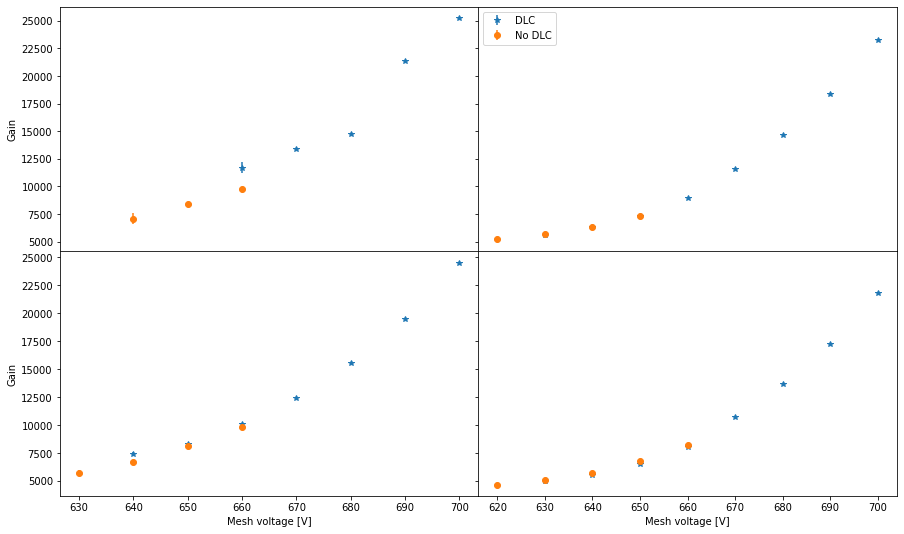

In [7]:
# Plot the gain in all 4 quadrants

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,9),sharex='col', sharey='row')
ax1.errorbar(UH_DLC_Vmesh,UH_DLC_xLyH_gain,yerr=UH_DLC_xLyHgain_err,fmt="*")
ax1.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xLyH_gain,yerr=UH_NoDLC_xLyHgain_err,fmt="o")
ax2.errorbar(UH_DLC_Vmesh,UH_DLC_xHyH_gain,yerr=UH_DLC_xHyHgain_err,fmt="*",label="DLC")
ax2.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xHyH_gain,yerr=UH_NoDLC_xHyHgain_err,fmt="o",label="No DLC")
ax2.legend()
ax3.errorbar(UH_DLC_Vmesh,UH_DLC_xLyL_gain,yerr=UH_DLC_xLyLgain_err,fmt="*")
ax3.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xLyL_gain,yerr=UH_NoDLC_xLyLgain_err,fmt="o")
ax4.errorbar(UH_DLC_Vmesh,UH_DLC_xHyL_gain,yerr=UH_DLC_xHyLgain_err,fmt="*")
ax4.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xHyL_gain,yerr=UH_NoDLC_xHyLgain_err,fmt="o")

for ax in fig.get_axes():
    ax.set(xlabel='Mesh voltage [V]', ylabel='Gain')

for ax in fig.get_axes():
    ax.label_outer()

fig.subplots_adjust(wspace=0, hspace=0)

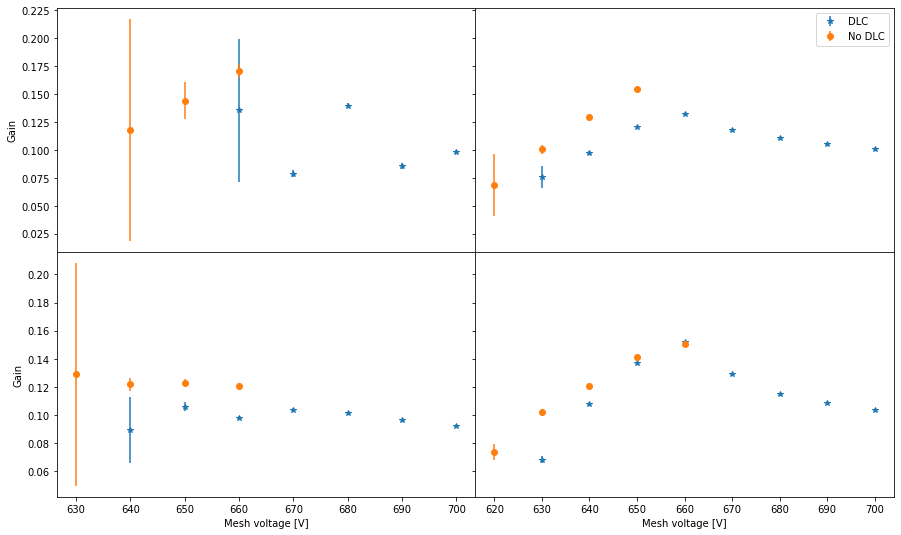

In [8]:
# Plot the fractional gain resolution in all 4 quadrants


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,9),sharex='col', sharey='row')
ax1.errorbar(UH_DLC_Vmesh,UH_DLC_xLyH_GR,yerr=UH_DLC_xLyH_GR_err,fmt="*")
ax1.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xLyH_GR,yerr=UH_NoDLC_xLyH_GR_err,fmt="o")
ax2.errorbar(UH_DLC_Vmesh,UH_DLC_xHyH_GR,yerr=UH_DLC_xHyH_GR_err,fmt="*",label="DLC")
ax2.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xHyH_GR,yerr=UH_NoDLC_xHyH_GR_err,fmt="o",label="No DLC")
ax2.legend()
ax3.errorbar(UH_DLC_Vmesh,UH_DLC_xLyL_GR,yerr=UH_DLC_xLyL_GR_err,fmt="*")
ax3.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xLyL_GR,yerr=UH_NoDLC_xLyL_GR_err,fmt="o")
ax4.errorbar(UH_DLC_Vmesh,UH_DLC_xHyL_GR,yerr=UH_DLC_xHyL_GR_err,fmt="*")
ax4.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xHyL_GR,yerr=UH_NoDLC_xHyL_GR_err,fmt="o")

for ax in fig.get_axes():
    ax.set(xlabel='Mesh voltage [V]', ylabel='Fractional Gain Resolution')

for ax in fig.get_axes():
    ax.label_outer()

fig.subplots_adjust(wspace=0, hspace=0)

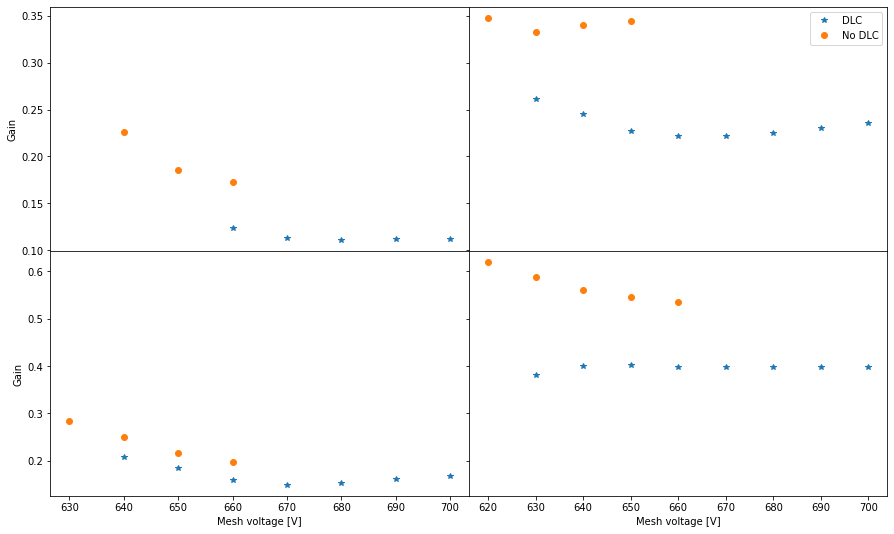

In [9]:
# Plot the charge sharing in all 4 quadrants

UH_NoDLC_xHyH_CS

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15,9),sharex='col', sharey='row')
ax1.errorbar(UH_DLC_Vmesh,UH_DLC_xLyH_CS,fmt="*")
ax1.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xLyH_CS,fmt="o")
ax2.errorbar(UH_DLC_Vmesh,UH_DLC_xHyH_CS,fmt="*",label="DLC")
ax2.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xHyH_CS,fmt="o",label="No DLC")
ax2.legend()
ax3.errorbar(UH_DLC_Vmesh,UH_DLC_xLyL_CS,fmt="*")
ax3.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xLyL_CS,fmt="o")
ax4.errorbar(UH_DLC_Vmesh,UH_DLC_xHyL_CS,fmt="*")
ax4.errorbar(UH_NoDLC_Vmesh,UH_NoDLC_xHyL_CS,fmt="o")

for ax in fig.get_axes():
    ax.set(xlabel='Mesh voltage [V]', ylabel='Charge Sharing')

for ax in fig.get_axes():
    ax.label_outer()

fig.subplots_adjust(wspace=0, hspace=0)